In [ ]:
import numpy as np
import pandas as pd
from sklearn import *
from textblob import TextBlob # for sentiment analysis
from multiprocess import Pool

import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
COMMENT = 'comment_text'
LABELS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [4]:
train = pd.read_csv('jigsaw-toxic-comment-classification-challenge/train.csv')
test = pd.read_csv('jigsaw-toxic-comment-classification-challenge/test.csv')
test_labels = pd.read_csv('jigsaw-toxic-comment-classification-challenge/test_labels.csv')
sample_submission = pd.read_csv('jigsaw-toxic-comment-classification-challenge/sample_submission.csv')

/home/shanger_lin/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


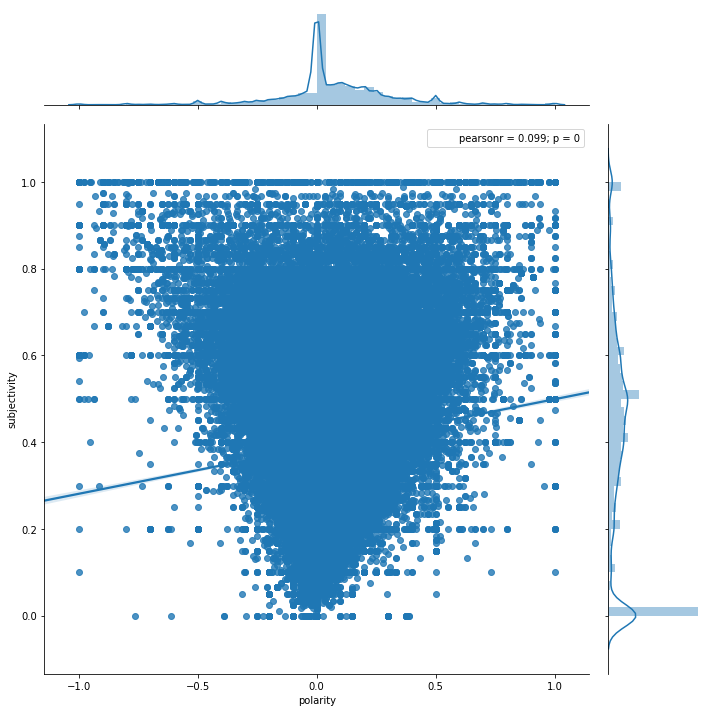

In [15]:
sns.jointplot(x="polarity", y="subjectivity", data=train, size=10, kind='reg');

toxic polarity


/home/shanger_lin/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


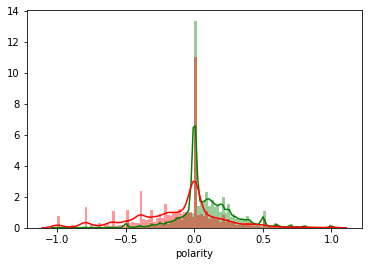

severe_toxic polarity


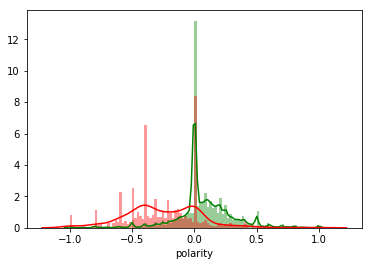

obscene polarity


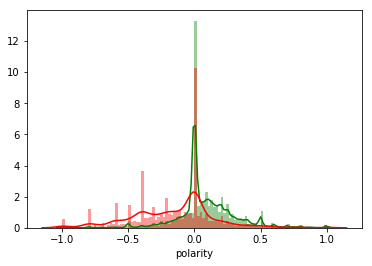

threat polarity


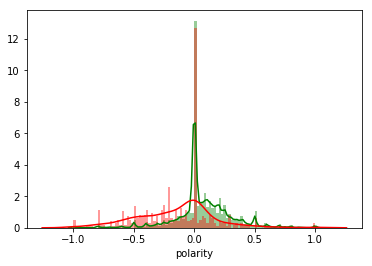

insult polarity


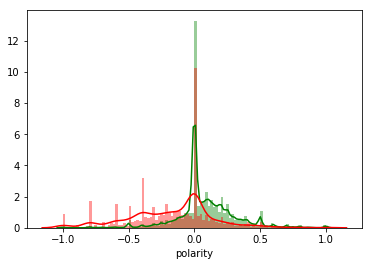

identity_hate polarity


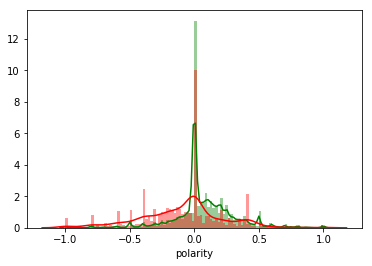

toxic subjectivity


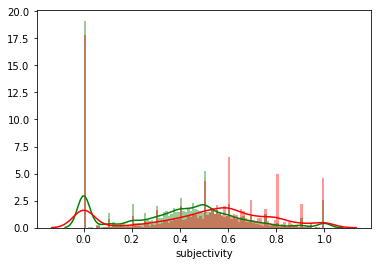

severe_toxic subjectivity


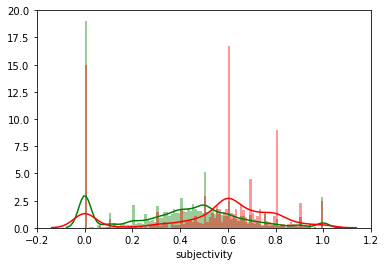

obscene subjectivity


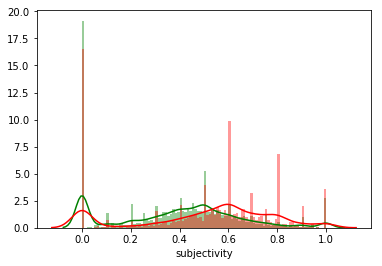

threat subjectivity


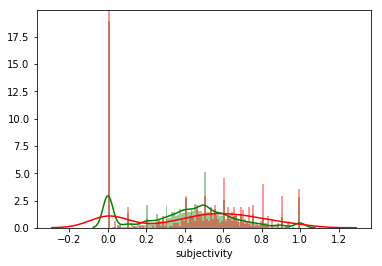

insult subjectivity


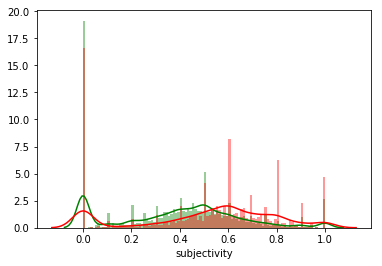

identity_hate subjectivity


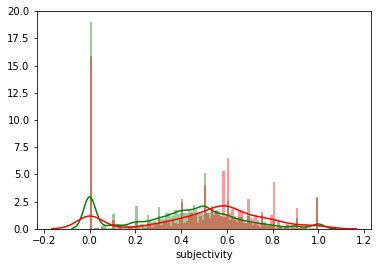

<Figure size 432x288 with 0 Axes>

In [36]:
for sentiment, toxic_type  in product(SENTIMENT, LABELS):
    print(toxic_type, sentiment)
    sns.distplot(train[train[toxic_type]==0][sentiment], color="g", bins=100, label='negative')
    sns.distplot(train[train[toxic_type]==1][sentiment], color="r", bins=100, label='positive')
    plt.show()
    plt.clf()  

In [ ]:
# NOTE
# Bias fits intuition.
# Both 'polarity', 'subjectivity' would be good features.
# Needs to deal with 0 values.
# Futher: get sentiment by sentence?

In [38]:
from wordcloud import WordCloud

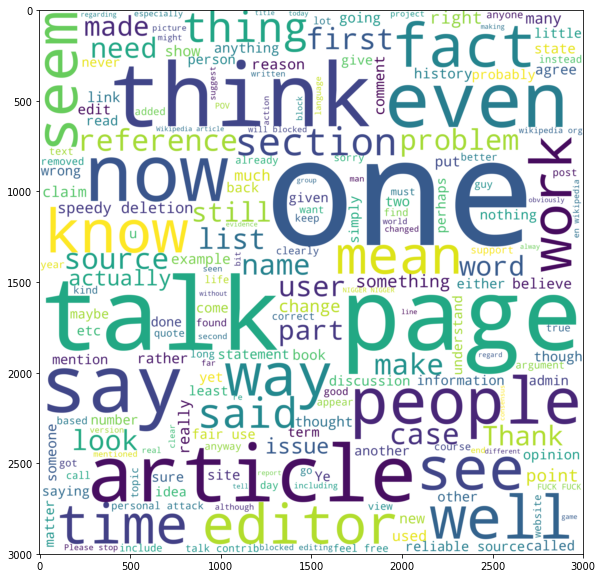

In [51]:
text = ' '.join(train[COMMENT]).lower()
wordcloud = WordCloud(background_color="white",width=3000, height=3000, margin=1).generate(text)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation='bilinear')

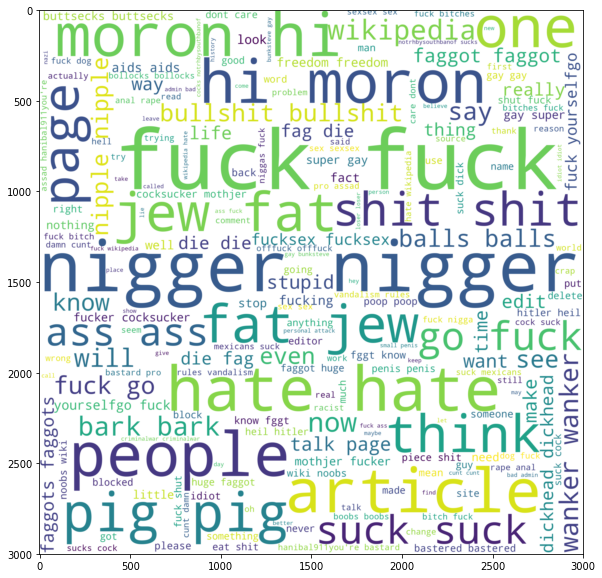

In [67]:
text = ' '.join(train[train['toxic']==1][COMMENT]).lower()
wordcloud = WordCloud(background_color="white",width=3000, height=3000, margin=1).generate(text)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation='bilinear')

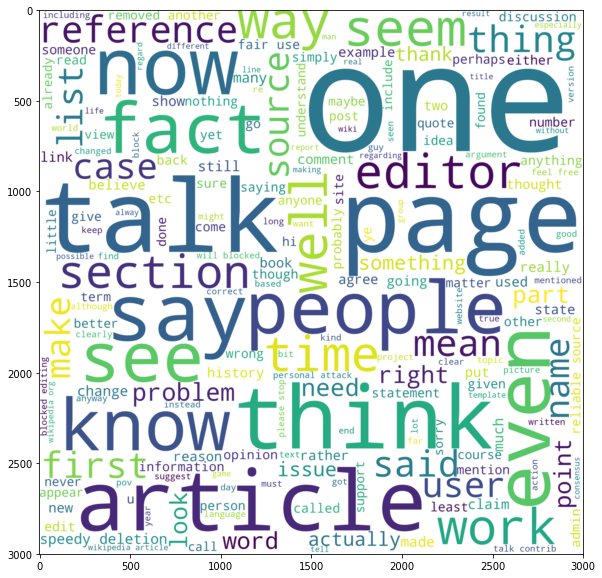

In [68]:
text = ' '.join(train[train['toxic']==0][COMMENT]).lower()
wordcloud = WordCloud(background_color="white",width=3000, height=3000, margin=1).generate(text)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation='bilinear')

In [130]:
import random
from nltk.tokenize import ToktokTokenizer
from itertools import chain
from collections import Counter

In [75]:
tokenizer = ToktokTokenizer()

In [170]:
train[train['toxic']==1].shape

(15294, 10)

In [172]:
train[train['toxic']==0].shape

(144277, 10)

In [174]:
len(n_token_lines)

144277

In [176]:
p_token_lines = tokenizer.tokenize_sents(train[train['toxic']==1][COMMENT].apply(lambda x: x.lower()))
p_tokens = list(chain.from_iterable(p_token_lines))
p_tokens = Counter(p_tokens)

In [177]:
n_token_lines = tokenizer.tokenize_sents(train[train['toxic']==0][COMMENT].apply(lambda x: x.lower()))
n_tokens = list(chain.from_iterable(n_token_lines))
n_tokens = Counter(n_tokens)

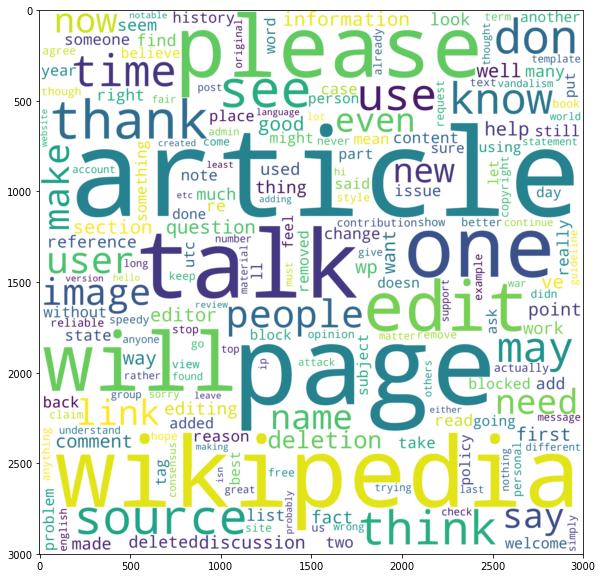

In [181]:
n_bias_tokens = {k: v - p_tokens.get(k, 0) for k, v in n_tokens.items() if (v - p_tokens.get(k, 0)) > 0}

n_bias_tokens_list = list()
for k, v in n_bias_tokens.items():
    n_bias_tokens_list.append([k]*v) 
n_bias_tokens_list = list(chain.from_iterable(n_bias_tokens_list))
random.shuffle(n_bias_tokens_list)
n_bias_tokens = ' '.join(n_bias_tokens_list)
text = n_bias_tokens
wordcloud = WordCloud(background_color="white",width=3000, height=3000, margin=10).generate(text)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation='bilinear')

In [187]:
p_bias_tokens = {k: (v - n_tokens.get(k, 0)) for k, v in p_tokens.items() if (v - n_tokens.get(k, 0)) > 0}

In [194]:
for k, v in p_bias_tokens.items():
    if v==1:
        print(k)

-contribution
sityush
antisemmitian
greetingshhh
tatoo
satanistic
fuckeeed
down???/
=tony
fistfuckee.
fuckcock
mcdickerson.
sorrows
ejaculating
discplines.
skills/abilities
encylopia
wimp
oife
conndoms
j*sus.
permanat
raeasc
jessus
blrude
tw@
boy.u
smelly.fuck
people.you
lost.you
earth.bloody
fool.check
crawled
arses.
startle
24.77.205.229
gardez
non-pashtun
84.59.190.210
sh-t
shoving
asshole1
kkkkanuck
trash///
motherfucker111lol
retards1
dickhead11
tryinbg
muchacho.
sh_tty
coasters.
timberwolf
nown
moar
dangerouser
grround
newseventsguy.
atoricity
brawling.
capoeira.
mestre
bimba
baiana.
malandrismo.
-sincerely
24/7.
unattented
priyanath
sacrilage.
perish.
71.39.183.86
mass-murdering
psychopath
bender.
94.1.96.85
genuineley
mattsanchez.info
schnider.
rebelguys
depaaarted
iritating
time.wikipedia
soapboxers
chuppah
redneckgirl
foreverlosttinkerbell
greenrabbit
starrocketsinflight
bree-robinson
enigma-72
cocainenightmares
tokyodome
chad_ocho-cinco
g-dawg
head_banging_brunette
classicag

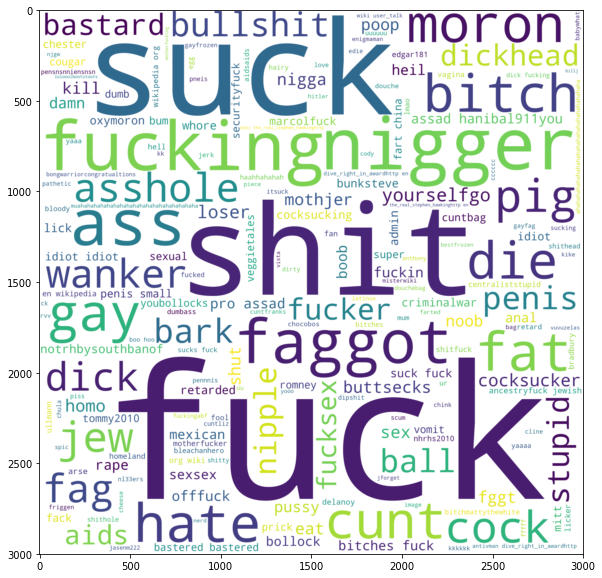

In [183]:
p_bias_tokens = {k: (v - n_tokens.get(k, 0)) for k, v in p_tokens.items() if (v - n_tokens.get(k, 0)) > 0}

p_bias_tokens_list = list()
for k, v in p_bias_tokens.items():
    p_bias_tokens_list.append([k]*v) 
p_bias_tokens_list = list(chain.from_iterable(p_bias_tokens_list))
random.shuffle(p_bias_tokens_list)
p_bias_tokens = ' '.join(p_bias_tokens_list)
text = p_bias_tokens
wordcloud = WordCloud(background_color="white",width=3000, height=3000, margin=10).generate(text)
plt.figure(figsize=(10,10)) 
plt.imshow(wordcloud, interpolation='bilinear')